### Data Source
##### Sloan Digital Sky Survey DR14: Classification of Stars, Galaxies and Quasar: 
##### https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

##### Description
10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). 17 feature and 1 class column (identifying observation as a star, galaxy or quasar)

##### Variables/Columns
 objid = Object Identifier (PhotoObj table) [unique-drop]<br>
 ra = Right Ascension (PhotoObj table) [numerical]<br>
 dec = Declination (PhotoObj table) [numerical]<br>
 u, g, r, i, z = 5 bands of the telescope (per the Gunn-Thuan griz astronomical magnitude system) [numerical]<br>
 run = Run Number identifies the specific scan [categorical-23]<br>
 rerun = specifies how image was processed [unique-drop]<br>
 camcol = Camera Column (1 - 6) identifies scanline w/in the Run [categorical-6]<br>
 field = Field Number ~ starts at 11 (after an init'l rampup time) & can be as large as 800 for longer runs [categorical-703]<br>
 specobjid = Object Identifier [categorical-6349]<br>
 class = Object Class [Classification Labels/categorical-3]<br>
 redshift = Final Redshift [categorical-9637]<br>
 plate = Round AL plates at positions of objects of interest through which holes are drilled to  pass optical fiber [categorical-487]<br>
 mjd = Modified Julian Date (of Observation) [categorical-355]<br>
 fiberid = Optical Fiber ID  [categorical-892]

### Load CSV Data/Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import warnings
# warnings.simplefilter('ignore')

In [2]:
obsrv = pd.read_csv('./data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

### Review/Clean Data 

In [3]:
obsrv.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [4]:
obsrv.specobjid.nunique()
df = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])

In [5]:
cols = df.columns
dts = df.dtypes
print(cols)
print(dts)

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'class', 'redshift'], dtype='object')
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
class        object
redshift    float64
dtype: object


In [6]:
#Shape
df.shape

(10000, 9)

In [7]:
df.describe()

,ra,dec,u,g,r,i,z,redshift
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,0.143726
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,0.388774
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,-0.004136
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,0.000081
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,0.042591
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,0.092579
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,5.353854


In [8]:
print(df.groupby('class').size())

class
GALAXY    4998
QSO        850
STAR      4152
dtype: int64


In [9]:
class_names = df['class']
class_names

0         STAR
1         STAR
2       GALAXY
3         STAR
4         STAR
         ...  
9995    GALAXY
9996    GALAXY
9997      STAR
9998    GALAXY
9999    GALAXY
Name: class, Length: 10000, dtype: object

### Proprocess Data
##### Update Class Column from STRING to INT

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# le.fit(class_names)
# list(le.classes_)
# le.transform(['GALAXY', 'QSO', 'STAR'])

df['class'] = le.fit_transform(df['class'])

In [11]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590


### Visualize Data

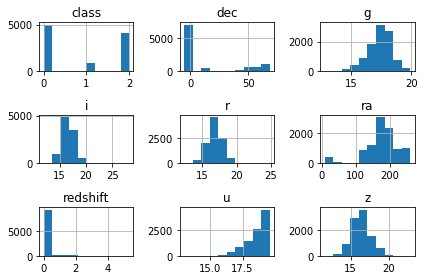

In [12]:
df.hist()
plt.tight_layout()

In [13]:
# field, g, i, r, ra, and z show a Gaussian distribution, which could indicate a correlation

In [14]:
df2 = pd.DataFrame(df, columns=['u','g','r','i','z', 'class'])
# df3 = pd.DataFrame(df, columns=['redshift','class'])
# df4 = pd.DataFrame(df, columns=['dec','ra','class'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E878418AC8>,
      dtype=object)

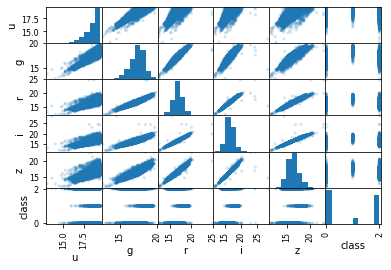

In [15]:
pd.plotting.scatter_matrix(df2, alpha=0.2)
# pd.plotting.scatter_matrix(df3, alpha=0.2)
# pd.plotting.scatter_matrix(df4, alpha=0.2)

### Linear Regression

In [16]:
# Assign the data to variables and reshape to create a 2D-array.
X = df[["u", "g","r","i","z"]]
y = df["class"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (10000, 5) (10000, 1)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [18]:
# View the shape for each array
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 5), (2500, 5), (7500, 1), (2500, 1))

In [19]:
# Create the LR model
from sklearn.linear_model import LinearRegression
model  = LinearRegression()
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# List coefficient for each feature
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

The coefficient for u is 0.6415623921960127
The coefficient for g is -1.4671491953984828
The coefficient for r is -1.4103806542961532
The coefficient for i is 0.1694184450505477
The coefficient for z is 1.9870394189574232


In [21]:
# List model intercept
intercept = model.intercept_[0]

print("The intercept for this LR model is {}".format(intercept))

The intercept for this LR model is 2.7594768890399175


In [22]:
#Scoring Model (r2 score of the training and test data)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.48783208749839846
Testing Score: 0.5229899812319792


In [23]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")

Mean Squared Error (MSE): 0.4303881280360765
R-Squared (R2): 0.5229899812319792


#### Standard Scaler

In [24]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [25]:
## Normalize all the data based on the trained set
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

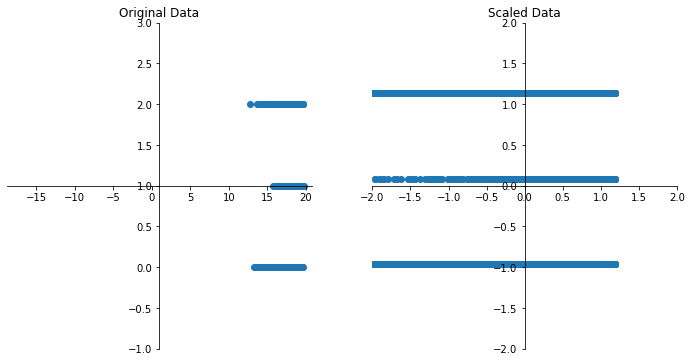

In [26]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["g"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["g"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

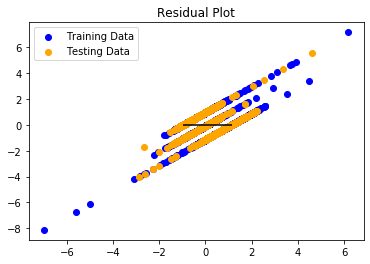

In [27]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [28]:
model.coef_

array([[ 0.55605398, -1.44886647, -1.5810302 ,  0.2026284 ,  2.5171947 ]])